In [1]:
# Import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv("WHO-covid-data.csv")

In [3]:
data.shape

(242447, 67)

In [4]:
data.drop([
    'new_deaths_smoothed',
    'new_cases_per_million',
    'total_cases_per_million'],
    axis=1, inplace=True
)

In [5]:
data.rename(columns={'date' : 'Date',
                   'location' : 'Country',
                   'continent' : 'Continent',
                   'iso_code' : 'ISO_code'},
                  inplace = True)

In [6]:
conti_unique = list(data.Continent.unique())

In [7]:
conti_unique

['Asia', nan, 'Europe', 'Africa', 'North America', 'South America', 'Oceania']

In [8]:
imputer = SimpleImputer(strategy='constant')
data2 = pd.DataFrame(imputer.fit_transform(data),columns=data.columns)

In [9]:
data3 = data2.groupby(['Date','Country','total_cases','total_deaths','total_vaccinations']).sum().reset_index()

In [10]:
data3['total_cases'].replace({'missing_value':0}, inplace=True)

In [11]:
data3['total_deaths'].replace({'missing_value':0}, inplace=True)

In [12]:
data3['total_vaccinations'].replace({'missing_value':0}, inplace=True)

In [13]:
data4 = data3[data3['total_deaths']>1000000]

In [14]:
countries = data4['Country'].unique()
len(countries)

10

In [15]:
country_deaths_greaterthan1000000 = list(data4.Country.unique())

In [16]:
country_deaths_greaterthan1000000

['World',
 'High income',
 'Upper middle income',
 'Europe',
 'South America',
 'Asia',
 'Lower middle income',
 'North America',
 'European Union',
 'United States']

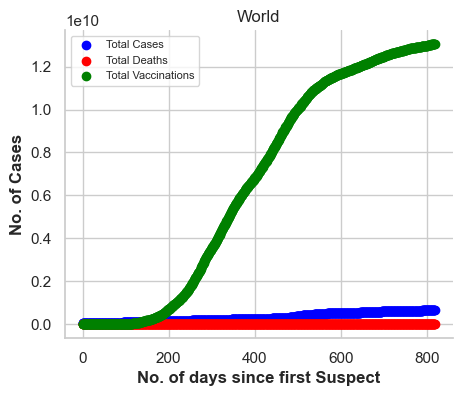

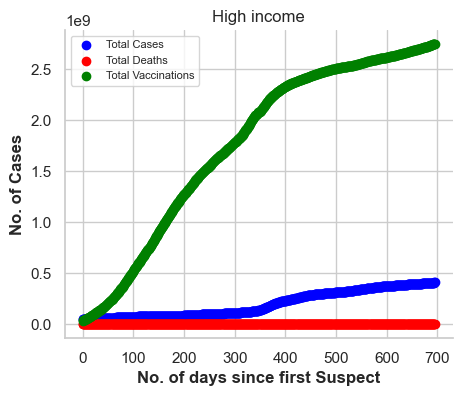

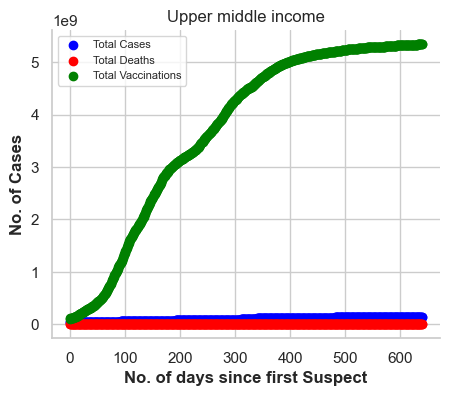

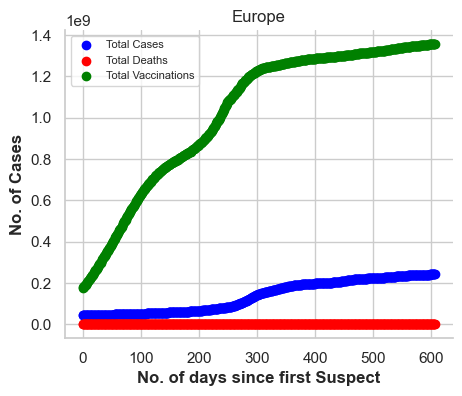

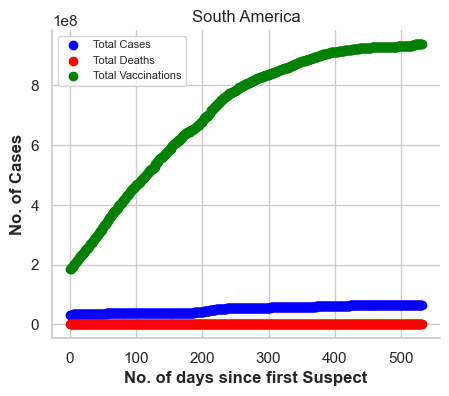

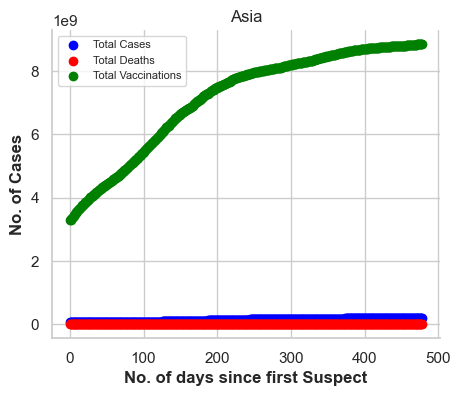

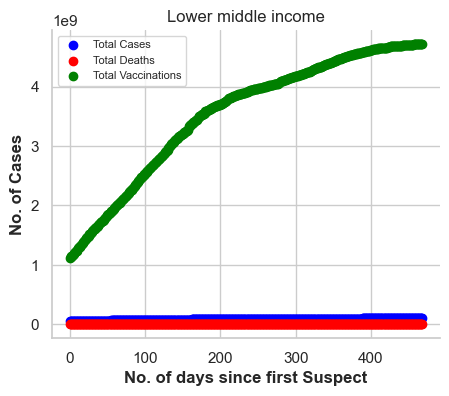

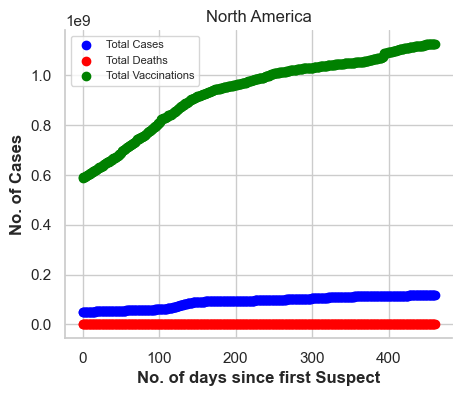

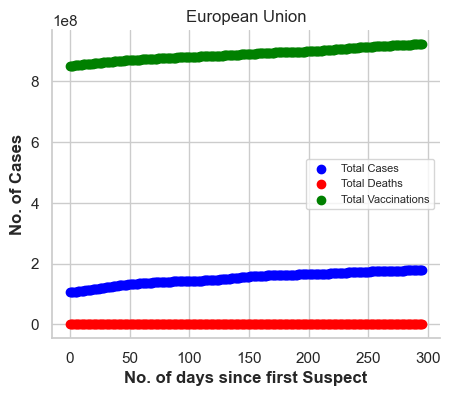

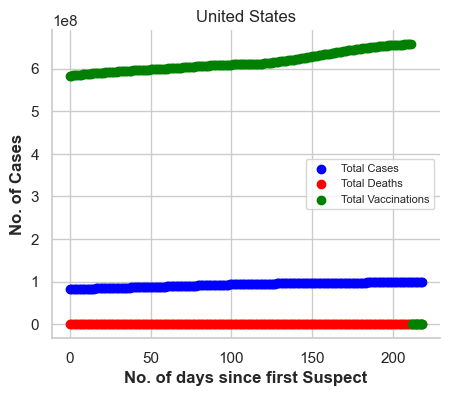

In [17]:
sns.set_style("whitegrid")
for idx in range(0,len(countries)):
    plt.figure(figsize=(5,4))
    C = data4[data4['Country']==countries[idx]].reset_index()
    plt.scatter( np.arange( 0,len(C) ),C['total_cases'],color = 'blue', label='Total Cases')
    plt.scatter( np.arange( 0,len(C) ),C['total_deaths'],color = 'red', label='Total Deaths')
    plt.scatter( np.arange( 0,len(C) ),C['total_vaccinations'],color = 'green', label='Total Vaccinations')
    plt.title(countries[idx])
    plt.xlabel("No. of days since first Suspect", weight='bold')
    plt.ylabel("No. of Cases", weight='bold')
    plt.legend(loc='best', fontsize=8)
    sns.despine()
    plt.savefig(str(country_deaths_greaterthan1000000[idx]) + '.png')
    plt.show()